# Womens Clothing Reviews Analysis

Context
Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not - recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
pd.set_option('display.max_colwidth', -1)
%matplotlib inline

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
print(df.nunique())
df.head(3)

Unnamed: 0                 23486
Clothing ID                1206 
Age                        77   
Title                      13993
Review Text                22634
Rating                     5    
Recommended IND            2    
Positive Feedback Count    82   
Division Name              3    
Department Name            6    
Class Name                 20   
dtype: int64


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses


In [4]:
df['Review Text'][92]

nan

In [5]:
df.dtypes

Unnamed: 0                 int64 
Clothing ID                int64 
Age                        int64 
Title                      object
Review Text                object
Rating                     int64 
Recommended IND            int64 
Positive Feedback Count    int64 
Division Name              object
Department Name            object
Class Name                 object
dtype: object

# Sentimeter

Either we can look for Recommended IND or for Positive Feedback Count. A person will recommend an item iff she's pleased with it. Hence,  we can say that if a woman has recommended a product, her review must be positive. In short 1 for Recommended IND means the girl liked it i.e. positive sentiment and 0 means she didn't like it which means it's a negative sentiment. Let's build a simple classifier based on this assumption.

A viewer of the comment can give a positive feedback or a like which can also be used as a sentiment meter but we can use it later. Let's use only Recommended IND now.

We can also use the Ratings column and say that if the rating is less than 2, then the buyer held a bad sentiment about the product else, she liked the product and her review is positive.

# Analyzing the text

Let's perform basic preprocessing on the text.

## Normalize and Tokenize

In [6]:
reviews = list(df['Review Text'].str.lower())

In [7]:
reviews[:2]

['absolutely wonderful - silky and sexy and comfortable',
 'love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.']

In [8]:
from nltk.tokenize import word_tokenize
tokenized_reviews = []
for i in reviews:
    try:
        x = re.sub(r'[\.\-,\(\)\!\[\]\{\}\:\;\d\'\"\@\#\=\%\\]','',i)
        tokenized_reviews.append(word_tokenize(x))
    except:
        tokenized_reviews.append(['error'])

In [9]:
print(tokenized_reviews[92])

['error']


## Stemming

In [10]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed_tokens = []
for i in tokenized_reviews[:1000]:
    doc = []
    for j in i:
        doc.append(ps.stem(j))
    stemmed_tokens.append(doc)

## Stopwords Removal

Remove the stopwords based on domain and general stopwords as well.

In [11]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [12]:
SW = set(stopwords.words('english'))

In [13]:
print(stemmed_tokens[:5])

[['absolut', 'wonder', 'silki', 'and', 'sexi', 'and', 'comfort'], ['love', 'thi', 'dress', 'it', 'sooo', 'pretti', 'i', 'happen', 'to', 'find', 'it', 'in', 'a', 'store', 'and', 'im', 'glad', 'i', 'did', 'bc', 'i', 'never', 'would', 'have', 'order', 'it', 'onlin', 'bc', 'it', 'petit', 'i', 'bought', 'a', 'petit', 'and', 'am', 'i', 'love', 'the', 'length', 'on', 'me', 'hit', 'just', 'a', 'littl', 'below', 'the', 'knee', 'would', 'definit', 'be', 'a', 'true', 'midi', 'on', 'someon', 'who', 'is', 'truli', 'petit'], ['i', 'had', 'such', 'high', 'hope', 'for', 'thi', 'dress', 'and', 'realli', 'want', 'it', 'to', 'work', 'for', 'me', 'i', 'initi', 'order', 'the', 'petit', 'small', 'my', 'usual', 'size', 'but', 'i', 'found', 'thi', 'to', 'be', 'outrag', 'small', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up', 'i', 'reorder', 'it', 'in', 'petit', 'medium', 'which', 'wa', 'just', 'ok', 'overal', 'the', 'top', 'half', 'wa', 'comfort', 'and', 'fit', 'nice', 'but', 'the

In [14]:
x = []
for i in stemmed_tokens:
    for j in i:
        if not(j in SW):
            x.append(j)

In [15]:
fdist = FreqDist(word_tokenize(' '.join(x)))

In [16]:
count = 0
for i in fdist.elements():
    count = count + 1

In [17]:
count

30248

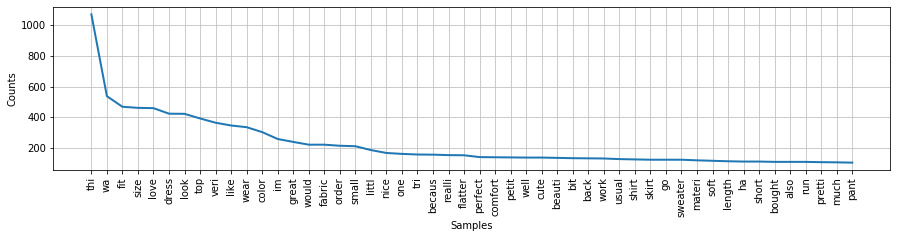

In [18]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,3
fdist.plot(50)
plt.show()

In [19]:
sw_new = ['thi','wa', 'dress', 'love', 'fit'] #, 'like', 'wear', 'great','im', 'would', '']

In [20]:
SW = SW.union(set(sw_new))

In [21]:
final_reviews = []
for i in stemmed_tokens:
    rev = []
    for j in i:
        if not(j in SW):
            rev.append(j)
    final_reviews.append(' '.join(rev))

In [22]:
data = pd.DataFrame({'Reviews':final_reviews, 'Target':df['Recommended IND'][:1000]})

In [23]:
data.head()

,Reviews,Target
0,absolut wonder silki sexi comfort,1
1,sooo pretti happen find store im glad bc never would order onlin bc petit bought petit length hit littl knee would definit true midi someon truli petit,1
2,high hope realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort nice bottom half veri tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c,0
3,jumpsuit fun flirti fabul everi time wear get noth great compliment,1
4,shirt veri flatter due adjust front tie perfect length wear leg sleeveless pair well ani cardigan shirt,1


# Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.Reviews, data.Target, stratify = data.Target, test_size = 0.3, random_state = 0)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer().fit(X_train)

In [27]:
X_train = tfidfVec.transform(X_train)
X_test = tfidfVec.transform(X_test)

# Model Building

## Multinomial Naive-Bayes

In [28]:
data.Target.value_counts()

1    818
0    182
Name: Target, dtype: int64

In [29]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import roc_auc_score, classification_report
MNB = MultinomialNB().fit(X_train, y_train)
y_pred = MNB.predict(X_test)

print("Statistics for classification are as follows: \n\n{}\n".format(classification_report(y_test, y_pred)))
print("ROC AUC Score {}".format(roc_auc_score(y_test, y_pred)))

Statistics for classification are as follows: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.82      1.00      0.90       245

    accuracy                           0.82       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.67      0.82      0.73       300


ROC AUC Score 0.5


C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

clfr = LogisticRegression(C = 100)
clfr.fit(X_train, y_train)

y_pred_proba = clfr.predict_proba(X_test)
y_prob = []
for i in y_pred_proba:
    y_prob.append(i[1])

fpr, tpr, thr = roc_curve(y_test, y_prob, pos_label = 1)

C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
ROC_AUC_DF = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thr})
ROC_AUC_DF['F1'] = 2 * (1 - ROC_AUC_DF.FPR) * ROC_AUC_DF.TPR / (ROC_AUC_DF.TPR + 1 - ROC_AUC_DF.FPR)
ROC_AUC_DF.head()

,FPR,TPR,Threshold,F1
0,0.000000,0.000000,1.999952,0.000000
1,0.000000,0.004082,0.999952,0.008130
2,0.000000,0.179592,0.998068,0.304498
3,0.018182,0.179592,0.998033,0.303642
4,0.018182,0.363265,0.992917,0.530317


In [32]:
ROC_AUC_DF[ROC_AUC_DF.F1 == ROC_AUC_DF.F1.max()]

,FPR,TPR,Threshold,F1
16,0.181818,0.795918,0.908976,0.806897


In [33]:
Thr = float(ROC_AUC_DF[ROC_AUC_DF.F1 == ROC_AUC_DF.F1.max()]['Threshold'])
Thr

0.9089756528180983

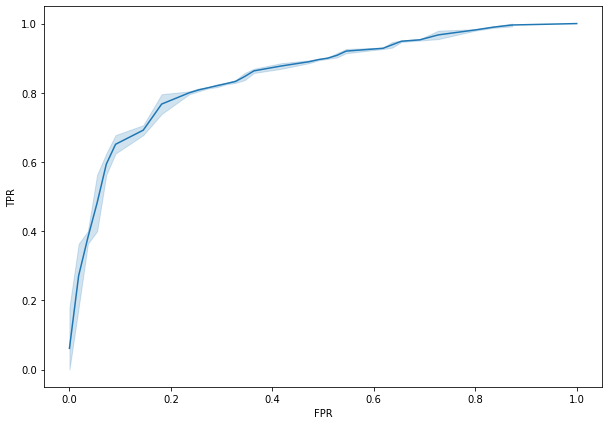

In [34]:
rcParams['figure.figsize'] = 10, 7
sns.lineplot(x = "FPR", y = "TPR",  data = ROC_AUC_DF)
plt.show()

In [35]:
y_pred_LR = []
for i in y_prob:
    if i >= Thr:
        y_pred_LR.append(1)
    else:
        y_pred_LR.append(0)

In [36]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.47      0.82      0.60        55
           1       0.95      0.80      0.87       245

    accuracy                           0.80       300
   macro avg       0.71      0.81      0.73       300
weighted avg       0.86      0.80      0.82       300



In [37]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(data.Reviews, data.Target, stratify = data.Target, test_size = 0.3, random_state = 0)
indices = X_ts.index
pd.DataFrame({'Review':df['Review Text'][indices], 'Prediction':y_pred_LR, 'Test':y_ts})

,Review,Prediction,Test
704,"The colors and print are absolutely beautiful and i'm quite heartbroken that this suit just doesn't fit. i don't have a long torso but the v was just so plunging that i wouldn't feel comfortable leaving the backyard lounge chair in this bathing suit. no matter how much i tied the halter it still revealed a v halfway down to my naval. the strange thing is that there seemed to be too much fabric on top, lots of ruching and thicker straps than i would normally go for, and while i'm only around a b",1,0
285,"After missing out on last year's similar dress, i am so glad i finally purchased this one! it is beautiful in person. i bought to wear to a wedding, but i am curious if others think it might be too white? i bought the peach color. i will keep this dress no matter what. hope they come out with more next season!",1,1
337,"I just got this dress in the mail today and it is even better in person! the description didn't give as much information as i wanted so i'm going to be very detailed in this review. i did take off one star for quality because some of the beads are already loose (two fell off when i picked the dress up for the first time), and i'll have to hand sew others on more tightly. my usual size is a pxs or p0, and there were no petite sizes available. however the size 0 fits perfectly, no alterations need",1,1
442,"Nice tee, true red,3/4 sleeves, lacing is a nice touch. good quality and great sale price.",1,1
390,"Ordered this dress online, and i love it! i was looking for an understated but fun new years dress and this was exactly what i was looking for. the only minor qualm i had about the dress was that the velvet dots that hit where the seams met made the dress look puffier than it should some parts around the waist, but for the most part, the dress fit very well and was very flattering, may just need a little bit of ironing. i am 5'9 and usually am more conscious of how things fit around my hips, and",0,1
...,...,...,...
707,NaN,1,1
39,Great casual top with flare. looks cute with grey pilcro stet jeans. flattering with peplum in back. nice cut for shoulders and neckline.,1,1
861,"Can be dressed up or down. the top part is tight, while the bottom has a beautiful skirt. i'm slightly busty and about 5'6"" and the size 6 is perfect for me.",1,1
267,Love the look and quality of this jacket. i&amp;#39;d say it fits true to size but it is way too short for me (i&amp;#39;m just under 6&amp;#39; tall). wish these came in tall sizes!,1,1


# SMOTE
## Multinomial Naive Bayes

In [38]:
import imblearn as imb
from imblearn.over_sampling import SMOTE
SMT = SMOTE()

X_t, y_t = SMT.fit_sample(X_train, y_train)

MNB = MultinomialNB().fit(X_t, y_t)
y_pred_SMOTE = MNB.predict(X_test)

print("Statistics for classification are as follows: \n\n{}\n".format(classification_report(y_test, y_pred_SMOTE)))
print("ROC AUC Score {}".format(roc_auc_score(y_test, y_pred_SMOTE)))

Statistics for classification are as follows: 

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        55
           1       0.93      0.79      0.85       245

    accuracy                           0.78       300
   macro avg       0.68      0.76      0.70       300
weighted avg       0.84      0.78      0.80       300


ROC AUC Score 0.7595547309833024


## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

clfr = LogisticRegression(C = 100)
clfr.fit(X_t, y_t)

y_pred_proba = clfr.predict_proba(X_test)
y_prob = []
for i in y_pred_proba:
    y_prob.append(i[1])

fpr, tpr, thr = roc_curve(y_test, y_prob, pos_label = 1)

C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
ROC_AUC_DF = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thr})
ROC_AUC_DF['F1'] = 2 * (1 - ROC_AUC_DF.FPR) * ROC_AUC_DF.TPR / (ROC_AUC_DF.TPR + 1 - ROC_AUC_DF.FPR)
ROC_AUC_DF.head()

,FPR,TPR,Threshold,F1
0,0.000000,0.000000,1.999977,0.000000
1,0.000000,0.004082,0.999977,0.008130
2,0.000000,0.179592,0.998615,0.304498
3,0.018182,0.179592,0.998594,0.303642
4,0.018182,0.330612,0.994389,0.494656


In [41]:
ROC_AUC_DF[ROC_AUC_DF.F1 == ROC_AUC_DF.F1.max()]

,FPR,TPR,Threshold,F1
18,0.145455,0.742857,0.88165,0.794797


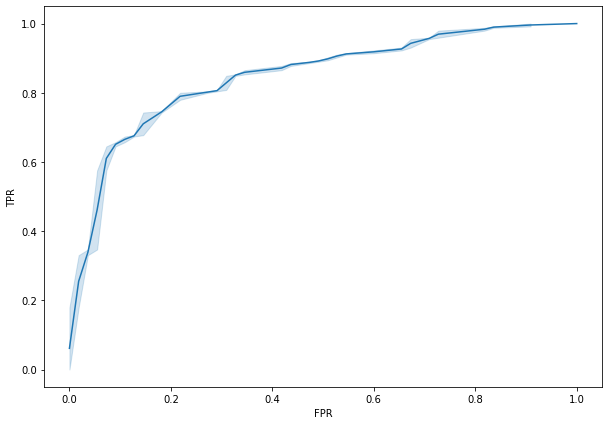

In [42]:
rcParams['figure.figsize'] = 10, 7
sns.lineplot(x = "FPR", y = "TPR",  data = ROC_AUC_DF)
plt.show()

In [43]:
y_pred_SMOTE_LR = []
for i in y_prob:
    if i >= Thr:
        y_pred_SMOTE_LR.append(1)
    else:
        y_pred_SMOTE_LR.append(0)

In [44]:
print(classification_report(y_test, y_pred_SMOTE_LR))

              precision    recall  f1-score   support

           0       0.40      0.85      0.54        55
           1       0.96      0.71      0.81       245

    accuracy                           0.74       300
   macro avg       0.68      0.78      0.68       300
weighted avg       0.85      0.74      0.77       300



In [45]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(data.Reviews, data.Target, stratify = data.Target, test_size = 0.3, random_state = 0)
indices = X_ts.index
pd.DataFrame({'Review':df['Review Text'][indices], 'Prediction':y_pred_LR, 'Test':y_ts})

,Review,Prediction,Test
704,"The colors and print are absolutely beautiful and i'm quite heartbroken that this suit just doesn't fit. i don't have a long torso but the v was just so plunging that i wouldn't feel comfortable leaving the backyard lounge chair in this bathing suit. no matter how much i tied the halter it still revealed a v halfway down to my naval. the strange thing is that there seemed to be too much fabric on top, lots of ruching and thicker straps than i would normally go for, and while i'm only around a b",1,0
285,"After missing out on last year's similar dress, i am so glad i finally purchased this one! it is beautiful in person. i bought to wear to a wedding, but i am curious if others think it might be too white? i bought the peach color. i will keep this dress no matter what. hope they come out with more next season!",1,1
337,"I just got this dress in the mail today and it is even better in person! the description didn't give as much information as i wanted so i'm going to be very detailed in this review. i did take off one star for quality because some of the beads are already loose (two fell off when i picked the dress up for the first time), and i'll have to hand sew others on more tightly. my usual size is a pxs or p0, and there were no petite sizes available. however the size 0 fits perfectly, no alterations need",1,1
442,"Nice tee, true red,3/4 sleeves, lacing is a nice touch. good quality and great sale price.",1,1
390,"Ordered this dress online, and i love it! i was looking for an understated but fun new years dress and this was exactly what i was looking for. the only minor qualm i had about the dress was that the velvet dots that hit where the seams met made the dress look puffier than it should some parts around the waist, but for the most part, the dress fit very well and was very flattering, may just need a little bit of ironing. i am 5'9 and usually am more conscious of how things fit around my hips, and",0,1
...,...,...,...
707,NaN,1,1
39,Great casual top with flare. looks cute with grey pilcro stet jeans. flattering with peplum in back. nice cut for shoulders and neckline.,1,1
861,"Can be dressed up or down. the top part is tight, while the bottom has a beautiful skirt. i'm slightly busty and about 5'6"" and the size 6 is perfect for me.",1,1
267,Love the look and quality of this jacket. i&amp;#39;d say it fits true to size but it is way too short for me (i&amp;#39;m just under 6&amp;#39; tall). wish these came in tall sizes!,1,1
